<a href="https://colab.research.google.com/github/rodrigosantucci/faculdade/blob/master/CorretorQuestoesFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicação de Logica Fuzzy em Sistema de Correção de Notas em Questões Discurssivas**


> Definir valor de nota para questões discurssivas baseadas em aproveitamento do aluno e aceitação do conteudo da resposta





* Entrada


> Qualidade da Resposta



1.   Universo: 0 a 10;
2.   Conjunto Difuso : Insuficiente, Incompleta e Aceitável.





> Aproveitamento


1.   Universo: 0 a 10;
2.   Conjunto Difuso: Ruim, Neutro e Bom.




* Saída


> Nota



1.   Universo: 0 a 10;
2.   Conjunto Difuso: Baixa,  Média e Alta.



> **Regras**





1.   Se a qualidade da resposta for ACEITÁVEL e o aproveitamento for BOM entao a nota deve ser alta.
2.   Se a qualidade da resposta for INCOMPLETA e o aproveitamento for BOM entao a nota deve ser média.
3. Se a qualidade da resposta for INSUFICIENTE e o aproveitamento for Ruim entao a nota deve ser baixa.



In [2]:
!pip install networkx==2.3
!pip install scikit-fuzzy

ERROR! Session/line number was not unique in database. History logging moved to new session 60
     |████████████████████████████████| 1.8MB 2.8MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=6499de42017b8260996d84fc2c2bf01bcaf634104a992e48570908d6a298eed8
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
resposta = ctrl.Antecedent(np.arange(0, 11, 1), 'resposta')
aproveitamento = ctrl.Antecedent(np.arange(0, 11, 1), 'aproveitamento')
nota = ctrl.Consequent(np.arange(0, 11, 1), 'nota')


resposta.automf(names=['insuficiente', 'incompleta', 'aceitavel'])


# Cria as funções de pertinência usando tipos variados
aproveitamento['ruim'] = fuzz.trimf(aproveitamento.universe, [0, 0, 5])
aproveitamento['neutro'] = fuzz.gaussmf(aproveitamento.universe, 5, 2)
aproveitamento['bom'] = fuzz.gaussmf(aproveitamento.universe, 10,3)

nota['baixa'] = fuzz.trimf(nota.universe, [0, 3, 5])
nota['média'] = fuzz.trapmf(nota.universe, [5, 6, 7,7.5])
nota['alta'] = fuzz.trimf(nota.universe, [8 ,9 ,10])


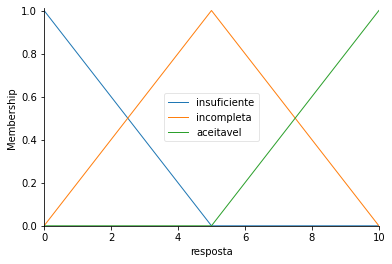

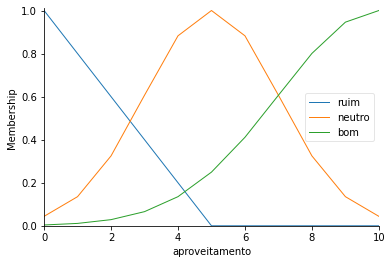

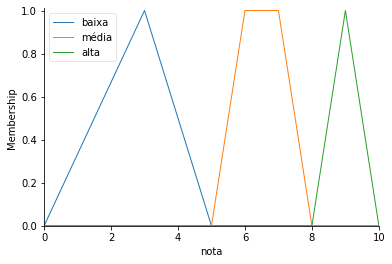

In [7]:
resposta.view()
aproveitamento.view()
nota.view()

In [0]:
regra1 = ctrl.Rule(resposta['aceitavel'] & aproveitamento['bom'], nota['alta'])
regra2 = ctrl.Rule(resposta['incompleta'] & aproveitamento['bom'], nota['média'])
regra3 = ctrl.Rule(resposta['insuficiente'] & aproveitamento['ruim'], nota['baixa'])

In [13]:
nota_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
nota_simulador = ctrl.ControlSystemSimulation(nota_ctrl)


nota_simulador.input['resposta'] = 3.5
nota_simulador.input['aproveitamento'] = 9.4

# Computando o resultado
nota_simulador.compute()
print("Nota da Questão:")
print(nota_simulador.output['nota'])

Nota da Questão:
6.499999999999999


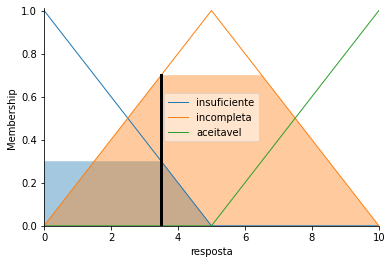

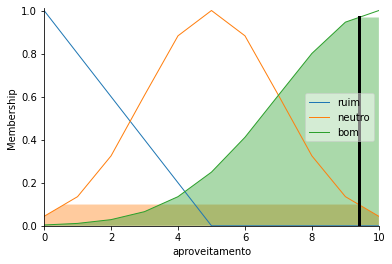

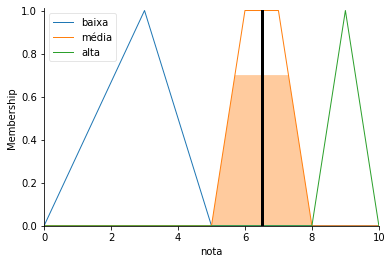

In [14]:
resposta.view(sim=nota_simulador)
aproveitamento.view(sim=nota_simulador)
nota.view(sim=nota_simulador)